In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from helio_cmb import*
import astropy
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM , z_at_value
#from astropy.cosmology import Planck13
import astropy.units as u
cosmo = FlatLambdaCDM(H0=100 * u.km / u.s / u.Mpc, Om0=0.3)
from astroML.plotting import scatter_contour
from astropy.coordinates import SkyCoord
from calc_kcor import*

In [2]:
fuji = pd.read_csv("fuji_fp_full.csv")
fuji

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,...,fibre_mag_r,fibre_mag_z,uncor_radius,BA_ratio,circ_radius,err_shape_r,err_shape_e1,err_shape_e2,pos_angle,Separation
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,16.859127,16.254347,5.184430,0.350286,3.068401,0.001139,0.000157,0.000162,-22.695267,9.032862e-10
1,39633328785066059,712,179.398240,55.458735,39633328785066059,2655,5975,sv2,bright,39633328785066059,...,15.308204,14.804471,9.025970,0.507324,6.428902,0.001573,0.000064,0.000059,41.649310,8.338294e-10
2,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,15.761744,15.127181,16.809520,0.724272,14.305606,0.001752,0.000059,0.000071,-1.229870,1.697334e-10
3,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,17.339570,16.825138,5.249352,0.847887,4.833643,0.002201,0.000309,0.000279,-30.161512,2.747763e-10
4,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,16.032228,15.487304,13.251365,0.668181,10.831973,0.003197,0.000090,0.000087,-31.605590,4.270247e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,39627586577372913,174,35.756452,-8.314618,39627586577372913,1187,36782,sv1,bright,39627586577372913,...,18.023610,17.431538,5.443123,0.879590,5.104913,0.001171,0.000259,0.000234,64.470810,1.820861e-10
6694,39627805192882082,102,139.833925,0.718408,39627805192882082,1331,27314,sv1,bright,39627805192882082,...,20.291128,19.665565,13.624000,0.390592,8.514643,0.033813,0.003029,0.002024,40.118137,1.190706e-09
6695,39627793843093694,787,183.258856,0.253032,39627793843093694,3470,26278,sv3,bright,39627793843093694,...,20.258633,19.694850,5.935657,0.842653,5.448703,0.008594,0.002901,0.001932,37.346825,8.243920e-10
6696,39632996659102707,111,253.477542,35.676715,39632996659102707,3479,9514,sv3,bright,39632996659102707,...,20.002720,19.292982,5.500339,0.484654,3.829176,0.021271,0.003459,0.003522,21.329023,9.071775e-10


In [3]:
fuji_gsigma = fuji.drop(fuji[fuji.ppxf_sigma_error/fuji.ppxf_sigma >= 0.1].index)

In [4]:
fuji_gsigma

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,...,fibre_mag_r,fibre_mag_z,uncor_radius,BA_ratio,circ_radius,err_shape_r,err_shape_e1,err_shape_e2,pos_angle,Separation
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,16.859127,16.254347,5.184430,0.350286,3.068401,0.001139,0.000157,0.000162,-22.695267,9.032862e-10
1,39633328785066059,712,179.398240,55.458735,39633328785066059,2655,5975,sv2,bright,39633328785066059,...,15.308204,14.804471,9.025970,0.507324,6.428902,0.001573,0.000064,0.000059,41.649310,8.338294e-10
2,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,15.761744,15.127181,16.809520,0.724272,14.305606,0.001752,0.000059,0.000071,-1.229870,1.697334e-10
3,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,17.339570,16.825138,5.249352,0.847887,4.833643,0.002201,0.000309,0.000279,-30.161512,2.747763e-10
4,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,16.032228,15.487304,13.251365,0.668181,10.831973,0.003197,0.000090,0.000087,-31.605590,4.270247e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,17.839487,17.051699,7.187451,0.732709,6.152344,0.001531,0.000148,0.000179,-78.008090,8.587498e-12
6603,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,17.332037,16.792889,4.282166,0.753509,3.717130,0.001335,0.000195,0.000232,8.803571,1.592094e-10
6607,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,18.080288,17.554085,5.009636,0.898508,4.748617,0.003211,0.000459,0.000573,81.171480,9.890864e-10
6657,39633149717645903,1640,246.339321,44.074430,39633149717645903,3498,9821,sv3,bright,39633149717645903,...,19.002388,18.328670,3.312801,0.726589,2.823838,0.008199,0.001876,0.002054,-23.286306,1.192500e-09


In [5]:
print (len(fuji), len(fuji_gsigma))

6698 4267


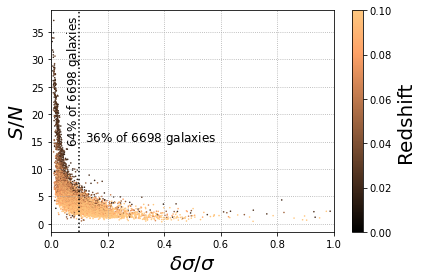

In [6]:
plt.xlim(0.0,1.0)
d02=plt.scatter(fuji.ppxf_sigma_error/fuji.ppxf_sigma,fuji.snr_ppxf,c=fuji.z,edgecolor='none',s=2.5,norm=colors.TwoSlopeNorm(vmin=0., vcenter=0.05, vmax=0.1),cmap=plt.cm.copper)#),label="25198 PV-FP galaxies")#cmap='gist_stern')#cmap='YlGnBu' or cmap=plt.cm.seismic
cbar2 = plt.colorbar(d02)
cbar2.set_label(r'Redshift', size=20)
#plt.scatter(ddsigma,snr,c=redshift,s=5,label="2221 PV-FP galaxies")
plt.xlabel(r'$\delta\sigma/\sigma$',size=20)
plt.ylabel(r'$S/N$',size=20)
#plt.axvline(x=0.1)
#plt.axhline(y=5.0)
#plt.xscale('log')
plt.text(0.05, 15, r'{0:.0f}'.format(100.*(len(fuji_gsigma)/len(fuji)))+'$\%$ of '+'{0:.0f}'.format(len(fuji))+' galaxies', rotation=90,color='black',size=12)
plt.text(0.12, 15, r'{0:.0f}'.format(100. - (100.*(len(fuji_gsigma)/len(fuji))))+'$\%$ of '+'{0:.0f}'.format(len(fuji))+' galaxies', rotation=0,color='black',size=12)
#plt.axvspan(0.0, 0.1, alpha=0.1, color='green')#, label="Velocity dispersion relative error < 10%")
#plt.axvspan(0.1, 1.0, alpha=0.1, color='red')#, label="Velocity dispersion relative error > 10%")
plt.axvline(0.1,0,100,c='black',linestyle=':')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
#plt.savefig('SNR_vs_delta_sigma_sv.pdf')
plt.savefig('SNR_vs_delta_sigma_sv.png')#, transparent=True)
plt.show()

In [8]:
fuji_gsigma_lowz = fuji_gsigma.drop(fuji_gsigma[fuji_gsigma.z > 0.1].index)

In [7]:
fuji_gsigma.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid',
       'id', 'healpix', 'survey', 'program', 'targetid.1', 'z', 'zerr',
       'zwarn', 'spectype', 'subtype', 'deltachi2', 'healpix_id',
       'targetid.2', 'target_ra', 'target_dec', 'obsconditions',
       'release', 'brickid_1', 'brick_objid', 'fiberflux_ivar_g',
       'fiberflux_ivar_r', 'fiberflux_ivar_z', 'morphtype', 'flux_g',
       'flux_r', 'flux_z', 'flux_ivar_g', 'flux_ivar_r', 'flux_ivar_z',
       'ebv', 'flux_w1', 'flux_w2', 'flux_ivar_w1', 'flux_ivar_w2',
       'fiberflux_g', 'fiberflux_r', 'fiberflux_z', 'fibertotflux_g',
       'fibertotflux_r', 'fibertotflux_z', 'sersic_1', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid_1', 'brickid.1', 'brickname_1', 'ra.1', 'dec.1',
       'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2',
       'BRICKID_2', 'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
       'Z_PHOT_MEDIAN',

In [9]:
print (len(fuji), len(fuji_gsigma), len(fuji_gsigma_lowz))

6698 4267 3243


In [10]:
print (fuji_gsigma_lowz.circ_radius,fuji_gsigma_lowz.err_shape_r)

0        3.068401
1        6.428902
2       14.305606
3        4.833643
4       10.831973
          ...    
6492     4.032464
6549     6.152344
6603     3.717130
6607     4.748617
6659     3.801431
Name: circ_radius, Length: 3243, dtype: float64 0       0.001139
1       0.001573
2       0.001752
3       0.002201
4       0.003197
          ...   
6492    0.004227
6549    0.001531
6603    0.001335
6607    0.003211
6659    0.001267
Name: err_shape_r, Length: 3243, dtype: float64


In [17]:
z_cor = perform_corr(fuji_gsigma_lowz.z, fuji_gsigma_lowz.ra_1, fuji_gsigma_lowz.dec_1, corrtype="full", dipole="Planck")

In [18]:
z_cor

array([0.02556934, 0.00285862, 0.02875144, ..., 0.03848246, 0.05872385,
       0.05340844])

In [19]:
c = 299792.458
ZMAX = 0.1*c
c_m_max = cosmo.comoving_distance(0.1)
maxvol = c_m_max.value**3.0
ZMIN = 0.003333*c
c_m_min = cosmo.comoving_distance(0.003333)
minvol = c_m_min.value**3.0

In [55]:
arc_to_kpc = cosmo.arcsec_per_kpc_proper(z_cor)
R_e = fuji_gsigma_lowz.circ_radius/arc_to_kpc.value
gr = fuji_gsigma_lowz.mag_g - fuji_gsigma_lowz.mag_r
kcorr_r = calc_kcor('r', fuji_gsigma_lowz.z, 'g - r', gr)
AbsMag = fuji_gsigma_lowz.mag_r - 5.0*(np.log10(cosmo.comoving_distance(z_cor).value)) - 25.0
Mu_e = fuji_gsigma_lowz.mag_r + (0.85*z_cor) + 2.5*np.log10(2*np.pi*(fuji_gsigma_lowz.circ_radius**2.0)) - 2.5*np.log10((z_cor+1)**4.0) - kcorr_r
logI_e = ( (0.4*4.65) - (0.4*Mu_e) + (2.0*np.log10(206265.0/10.0)))
logR_e = np.log10(R_e)
logS = np.log10(fuji_gsigma_lowz.ppxf_sigma)
r_desi = logR_e
s_desi = logS
i_desi = logI_e
dr = np.log(10)*(fuji_gsigma_lowz.err_shape_r/fuji_gsigma_lowz.uncor_radius)
ds = np.log(10)*(fuji_gsigma_lowz.ppxf_sigma_error/fuji_gsigma_lowz.ppxf_sigma)
di = fuji_gsigma_lowz.mag_r_err
D_lim = 10.0**(0.2*(18.0 - AbsMag -25.0))
pv_cor = np.log10(1.0+(300.0/(299792.458*z_cor)))
print (D_lim.values)
sprob00=[]
for i in range(len(D_lim)):
    z_lim = c*(z_at_value(cosmo.comoving_distance, D_lim.values[i] * u.Mpc,zmin=-0.1))
    c_m = cosmo.comoving_distance(z_lim/c)
    czvol = c_m.value**3.0
    if z_lim >= ZMAX:
        sprob00.append(1.0)
    if z_lim <= ZMIN:
        sprob00.append(0.0)
    if ZMIN < z_lim < ZMAX:
        sprob00.append((czvol - minvol) / (maxvol - minvol))




[ 374.86847661  122.71044791 1234.78372466 ...  417.69968791  602.16820141
  590.60755735]


In [59]:
#targetid,logR_e,s_sdss,i_sdss,0.013621,log10(1.0+(300.0/(299792.458*z_cor))),ds,di,sprob00,c*redshift)
fp_sample = pd.DataFrame(np.column_stack((fuji_gsigma_lowz.targetid,r_desi,s_desi,i_desi,dr,pv_cor,ds,di,sprob00,c*fuji_gsigma_lowz.z)),columns=["objid", "r", "s", "i", "dr", "dr_ph", "ds", "di", "Sprob", "cz"])

In [69]:
fp_sample.loc[:,"objid"] = fp_sample.objid.astype('long')

In [70]:
fp_sample

,objid,r,s,i,dr,dr_ph,ds,di,Sprob,cz
0,39628417112478216,0.043543,2.142927,2.945744,0.000506,0.016673,0.022928,0.000373,1.000000,7380.851869
1,39633328785066056,-0.574830,2.094888,3.191716,0.000401,0.130353,0.020418,0.000214,0.073483,689.740560
2,39628417133447720,0.761415,2.437662,2.548015,0.000240,0.014858,0.013168,0.000145,1.000000,8337.821434
3,39627769709071904,0.323109,2.173370,2.413567,0.000965,0.013752,0.023817,0.000488,1.000000,8962.503400
4,39633076111803112,0.305545,2.308273,2.731647,0.000556,0.032106,0.009379,0.000229,1.000000,3750.764392
...,...,...,...,...,...,...,...,...,...,...
3238,39633236212580576,0.327094,1.828250,2.144140,0.002288,0.011308,0.187937,0.001155,0.897818,11160.939836
3239,39627658551629976,0.544359,2.113934,2.262257,0.000490,0.010431,0.127291,0.000249,1.000000,12604.672182
3240,39627598560494824,0.297660,2.017074,2.543424,0.000718,0.011149,0.163043,0.000265,1.000000,11780.556671
3241,39633255741260888,0.577149,1.935949,2.316718,0.001476,0.007338,0.187824,0.001144,1.000000,17396.165873
